In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from readCanLitefileUtils import *
from calibUtils import *

In [12]:
def compute_CalibBiasV(df, df_calibparam, values):
    df = df.copy()
    a_coeff = 1.8535e-3
    b_coeff = 0
    LSBres = 1.8535e-3


    for val in values:
        #print(val)
        val_calib = val + '_calib'
    
        
        #compute ADC calibrated value in dec
        
        df[val] = df[val].apply(lambda x: int(x,16) )
        #df[val_calib] = ( df[val] + df_calibparam['Offset_Sig BiasV']) * (df_calibparam['Gain_Usig BiasV'] /32768) * a_coeff + b_coeff
        df[val_calib] = df[val] * 1.8535e-3
       

        #compare with the DMM value
        tmp_DMMlabel = val.replace('ADC', 'DMM')
        val_err = val + 'err'
        df[val_err] = df[tmp_DMMlabel]-df[val_calib]

        
        #compute error 
        val_sig = val + 'sigma'
        df[val_sig] = df[val_err]/LSBres
        
        
    return df

In [2]:
def drawplot(df, boardSN):
    plt.figure(figsize=(10,6))

    ax = plt.gca()


    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC000sigma', color="DarkBlue", label="DAC000 sigma", ax=ax, marker = 'o', s=40)
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC3FFsigma', color="DarkGreen", label="DAC3FF sigma ", ax=ax, marker = 'o', s=40)
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADCCFFsigma', color="Pink", label="DACCFF sigma", ax=ax, marker = 'o', s=40 )
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADCFFFsigma', color="Orange", label="DACFFF sigma", ax=ax, marker = 'o', s=40 )

    ax = plt.hlines(1, -0.2, 11.5, linestyles='dotted', color='red')
    ax = plt.hlines(-1, -0.2, 11.5, linestyles='dotted', color='red')

    plt.grid(b=True)
    plt.title('Error/LSB per channel (' + boardSN + ')')
    plt.xlabel('Channel')
    plt.ylabel('Error/LSB')

    plt.show()

    return

# define the inputs

#board SN04
SN_board = 'SN04'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset000.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset3FF.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetCFF.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetFFF.csv'


DMM_000 = [108.75, 108.757, 108.742, 108.746, 108.745, 108.745, 
          108.737, 108.743, 108.747, 108.717, 108.727, 108.757]

DMM_3FF = [110.638, 110.643, 110.631, 110.635, 110.636, 110.637,
          110.627, 110.631, 110.640, 110.602, 110.619, 110.651]

DMM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


MM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

# define the inputs


##SN11
SN_board = 'SN11'

#file 1 (DACset 0x000)
#file_DACset000 = './files/SN11/21-05-26_152152_validcalib_dacset000_v1.csv'
file_DACset000 = './files/SN11/21-05-31_112046_validcalib_SN11_DACset000_v3_20x.csv'


#file 2 (DACset 0x3FF)
#file_DACset3FF = './files/SN11/21-05-26_152152_validcalib_dacset3FF_v1.csv'
file_DACset3FF = './files/SN11/21-05-31_112046_validcalib_SN11_DACset3FF_v3_20x.csv'


#file 3 (DACset 0xCFF)
#file_DACsetCFF = './files/SN11/21-05-26_152152_validcalib_dacsetCFF_v1.csv'
file_DACsetCFF = './files/SN11/21-05-31_112046_validcalib_SN11_DACsetCFF_v3_20x.csv'


#file 4 (DACset 0xFFF)
#file_DACsetFFF = './files/SN11/21-05-26_152152_validcalib_dacsetFFF_v1.csv'
file_DACsetFFF = './files/SN11/21-05-31_112046_validcalib_SN11_DACsetFFF_v3_20x.csv'


#DMM_000 = [108.715, 108.745, 108.749, 108.744, 108.739, 108.721, 
#          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

#DMM_3FF = [110.600, 110.631, 110.644, 110.636, 110.633, 110.615,
#          110.624, 110.585, 110.638, 110.635, 110.636, 110.623]

#DMM_CFF = [114.870, 114.895, 114.906, 114.901, 114.891, 114.871,
#          114.888, 114.847, 114.904, 114.890, 114.897, 114.878]


#DMM_FFF = [116.285, 116.312, 116.324, 116.321, 116.314, 116.291,
#          116.311, 116.267, 116.328, 116.313, 116.319, 116.303]




DMM_000 = [108.716, 108.745, 108.750, 108.745, 108.739, 108.722, 
          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

DMM_3FF = [110.602, 110.633, 110.645, 110.637, 110.633, 110.616,
          110.624, 110.586, 110.638, 110.636, 110.636, 110.623]

DMM_CFF = [114.872, 114.895, 114.908, 114.904, 114.891, 114.872,
          114.888, 114.847, 114.904, 114.891, 114.897, 114.878]


DMM_FFF = [116.286, 116.312, 116.326, 116.323, 116.314, 116.293,
          116.311, 116.267, 116.327, 116.315, 116.319, 116.303]



values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


#df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v2_forcheck.csv',delimiter=',') 
df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v3_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

# define the inputs


##SN15

SN_board = 'SN15'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN15/21-05-27_165027_validcalib_dacset000_SN15_20x.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN15/21-05-27_165027_validcalib_dacset3FF_SN15_20x.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN15/21-05-27_165027_validcalib_dacsetCFF_SN15_20x.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN15/21-05-27_165027_validcalib_dacsetFFF_SN15_20x.csv'


DMM_000 = [108.745, 108.715, 108.767, 108.730, 108.751, 108.717, 
          108.708, 108.713, 108.760, 108.729, 108.762, 108.727]

DMM_3FF = [110.636, 110.602, 110.656, 110.615, 110.640, 110.607,
          110.597, 110.604, 110.652, 110.625, 110.652, 110.612]

DMM_CFF = [114.900, 114.871, 114.923, 114.884, 114.910, 114.876,
          114.862, 114.874, 114.914, 114.883, 114.916, 114.879]


DMM_FFF = [116.319, 116.292, 116.345, 116.303, 116.330, 116.294,
          116.279, 116.292, 116.337, 116.305, 116.336, 116.299]





values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN15_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN10

SN_board = 'SN10'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN10/21-06-04_113227_validcal_SN10_DACsete000_v0_100x.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN10/21-06-04_113227_validcal_SN10_DACsete3FF_v0_100x.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN10/21-06-04_113227_validcal_SN10_DACseteCFF_v0_100x.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN10/21-06-04_113227_validcal_SN10_DACseteFFF_v0_100x.csv'

DMM_000 = [108.746, 108.770, 108.754, 108.771, 108.765, 108.760, 
        108.787, 108.760, 108.779, 108.759, 108.753, 108.773]

DMM_3FF = [110.636, 110.657, 110.645, 110.661, 110.653, 110.654, 
        110.678, 110.649, 110.665, 110.645, 110.638, 110.661]

DMM_CFF = [114.904, 114.912, 114.910, 114.935, 114.929, 114.916, 
        114.939, 114.910, 114.932, 114.914, 114.912, 114.920]

DMM_FFF = [116.323, 116.335, 116.328, 116.358, 116.346, 116.335, 
        116.364, 116.334, 116.354, 116.334, 116.333, 116.343]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN10_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN03

SN_board = 'SN03'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN03/21-06-11_123738_testcalib_DACset000_SN03_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN03/21-06-11_123738_testcalib_DACset3FF_SN03_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN03/21-06-11_123738_testcalib_DACsetCFF_SN03_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN03/21-06-11_123738_testcalib_DACsetFFF_SN03_100x_v0.csv'

DMM_000 = [108.733, 108.711, 108.737, 108.737, 108.709, 108.719, 
        108.712, 108.723, 108.743, 108.716, 108.706, 108.727]

DMM_3FF = [110.622, 110.598, 110.628, 110.628, 110.596, 110.611, 
        110.602, 110.608, 110.634, 110.608, 110.599, 110.620]

DMM_CFF = [114.884, 114.854, 114.891, 114.883, 114.862, 114.873, 
        114.863, 114.886, 114.897, 114.864, 114.855, 114.887]

DMM_FFF = [116.303, 116.276, 116.310, 116.306, 116.282, 116.292, 
        116.285, 116.302, 116.319, 116.285, 116.278, 116.304]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN03_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN05

SN_board = 'SN05'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN05/21-06-11_120417_validcalib_DACset000_SN05_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN05/21-06-11_120417_validcalib_DACset3FF_SN05_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN05/21-06-11_120417_validcalib_DACsetCFF_SN05_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN05/21-06-11_120417_validcalib_DACsetFFF_SN05_100x_v0.csv'

DMM_000 = [108.750, 108.713, 108.738, 108.775, 108.756, 108.761, 
        108.741, 108.729, 108.755, 108.747, 108.742, 108.737]

DMM_3FF = [110.642, 110.606, 110.633, 110.667, 110.647, 110.653, 
        110.626, 110.621, 110.645, 110.637, 110.635, 110.629]

DMM_CFF = [114.904, 114.862, 114.895, 114.926, 114.906, 114.915, 
        114.902, 114.891, 114.914, 114.901, 114.909, 114.895]

DMM_FFF = [116.323, 116.287, 116.311, 116.350, 116.327, 116.334, 
        116.322, 116.307, 116.332, 116.324, 116.325, 116.317]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN05_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
#define the inputs
##SN09

SN_board = 'SN09'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN09/21-06-11_113110_validcalib_DACset000_SN09_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN09/21-06-11_113110_validcalib_DACset3FF_SN09_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN09/21-06-11_113110_validcalib_DACsetCFF_SN09_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN09/21-06-11_113110_validcalib_DACsetFFF_SN09_100x_v0.csv'

DMM_000 = [108.740, 108.742, 108.742, 108.754, 108.742, 108.747, 
        108.748, 108.757, 108.722, 108.758, 108.762, 108.756]

DMM_3FF = [110.627, 110.632, 110.630, 110.644, 110.629, 110.640, 
        110.636, 110.649, 110.610, 110.645, 110.654, 110.645]

DMM_CFF = [114.888, 114.890, 114.891, 114.905, 114.894, 114.907, 
        114.902, 114.919, 114.871, 114.910, 114.918, 114.910]

DMM_FFF = [116.309, 116.311, 116.311, 116.323, 116.311, 116.325, 
        116.321, 116.336, 116.295, 116.334, 116.340, 116.326]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN09_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN13

SN_board = 'SN13'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN13/'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN13/'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN13/'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN13/'

DMM_000 = [108.725, 108.730, 108.754, 108.730, 108.740, 108.729, 
        108.740, 108.740, 108.756, 108.750, 108.777, 108.747]

DMM_3FF = [110.617, 110.622, 110.644, 110.617, 110.635, 110.617, 
        110.626, 110.627, 110.639, 110.643, 110.665, 110.632]

DMM_CFF = [114.874, 114.880, 114.905, 114.878, 114.891, 114.889, 
        114.886, 114.897, 114.905, 114.910, 114.935, 114.903]

DMM_FFF = [116.291, 116.302, 116.324, 116.300, 116.312, 116.305, 
        116.307, 116.319, 116.225, 116.327, 116.353, 116.325]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN013_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

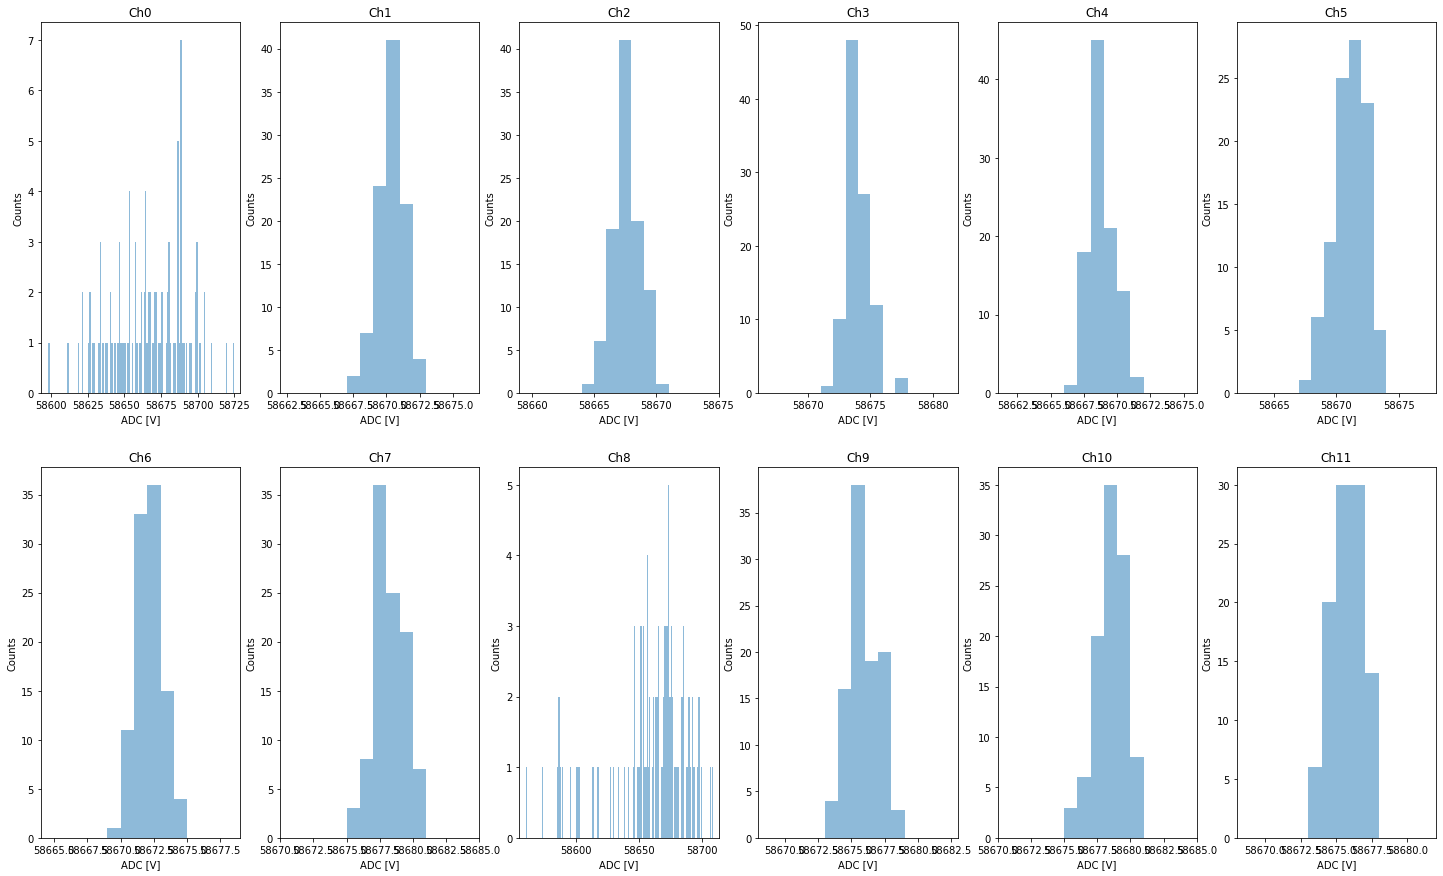

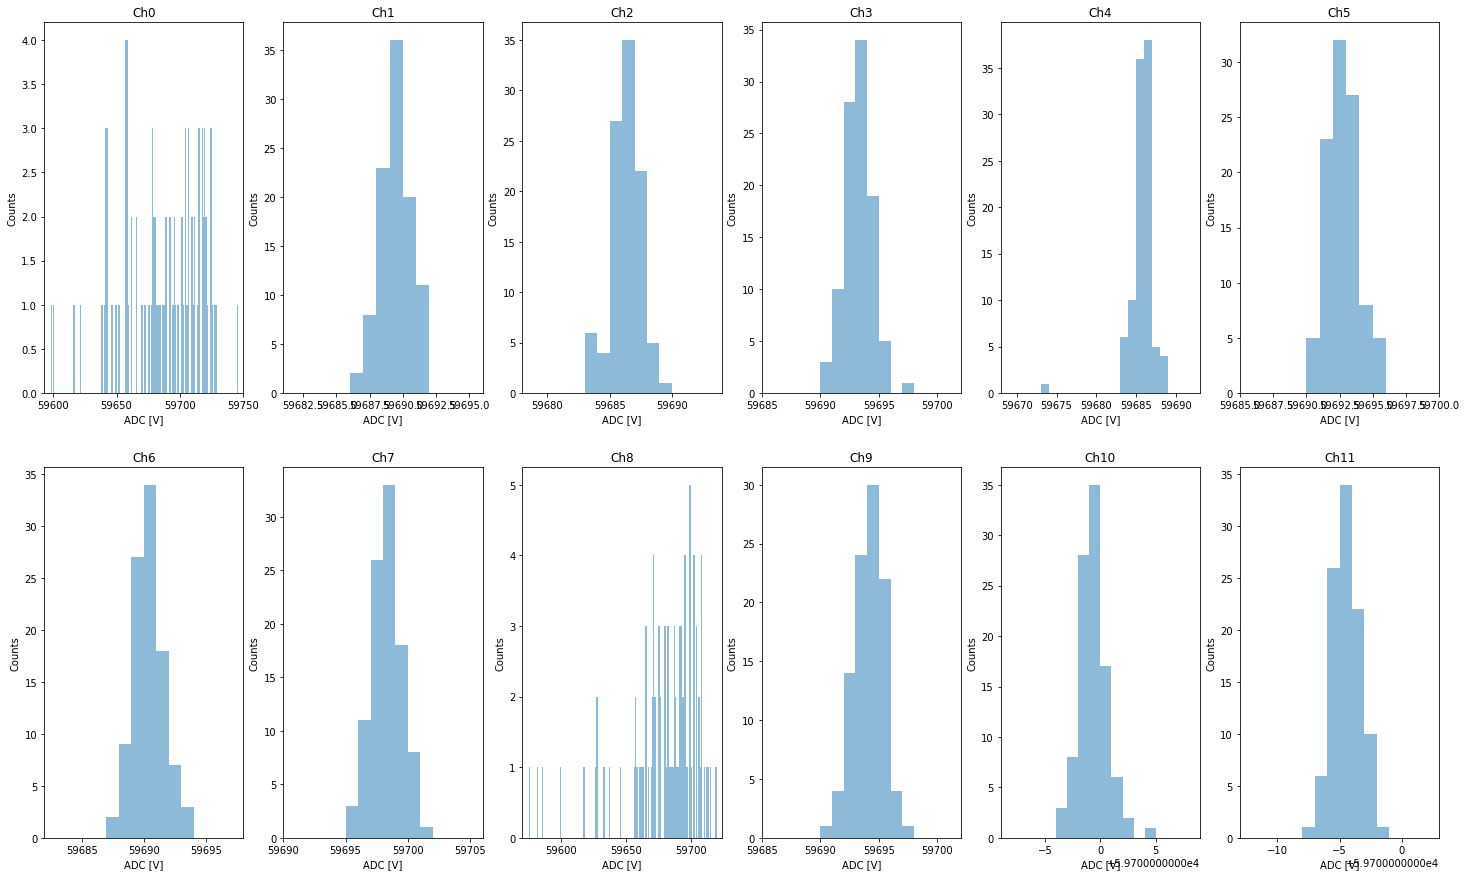

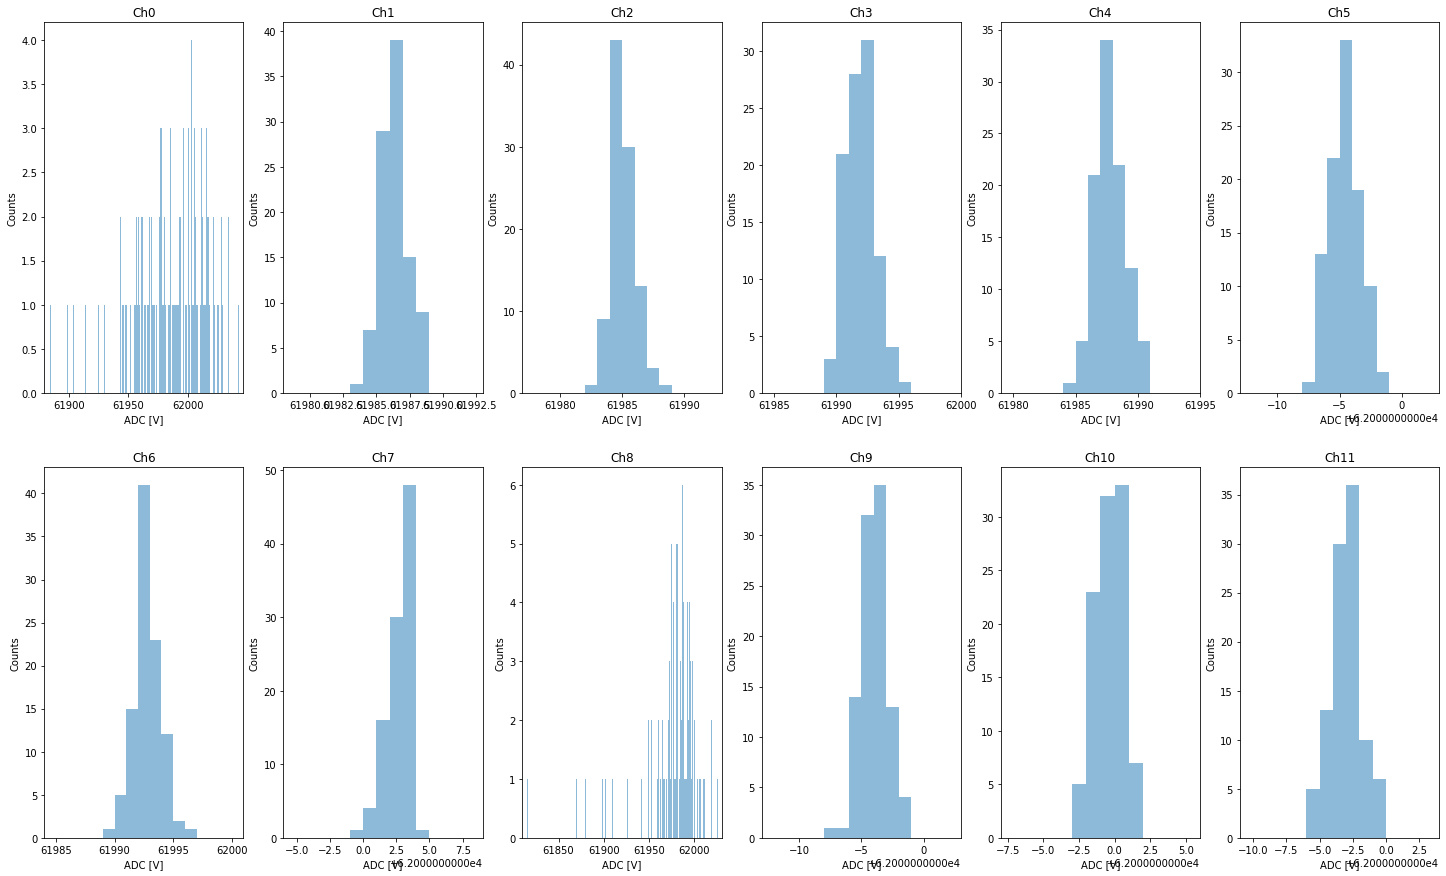

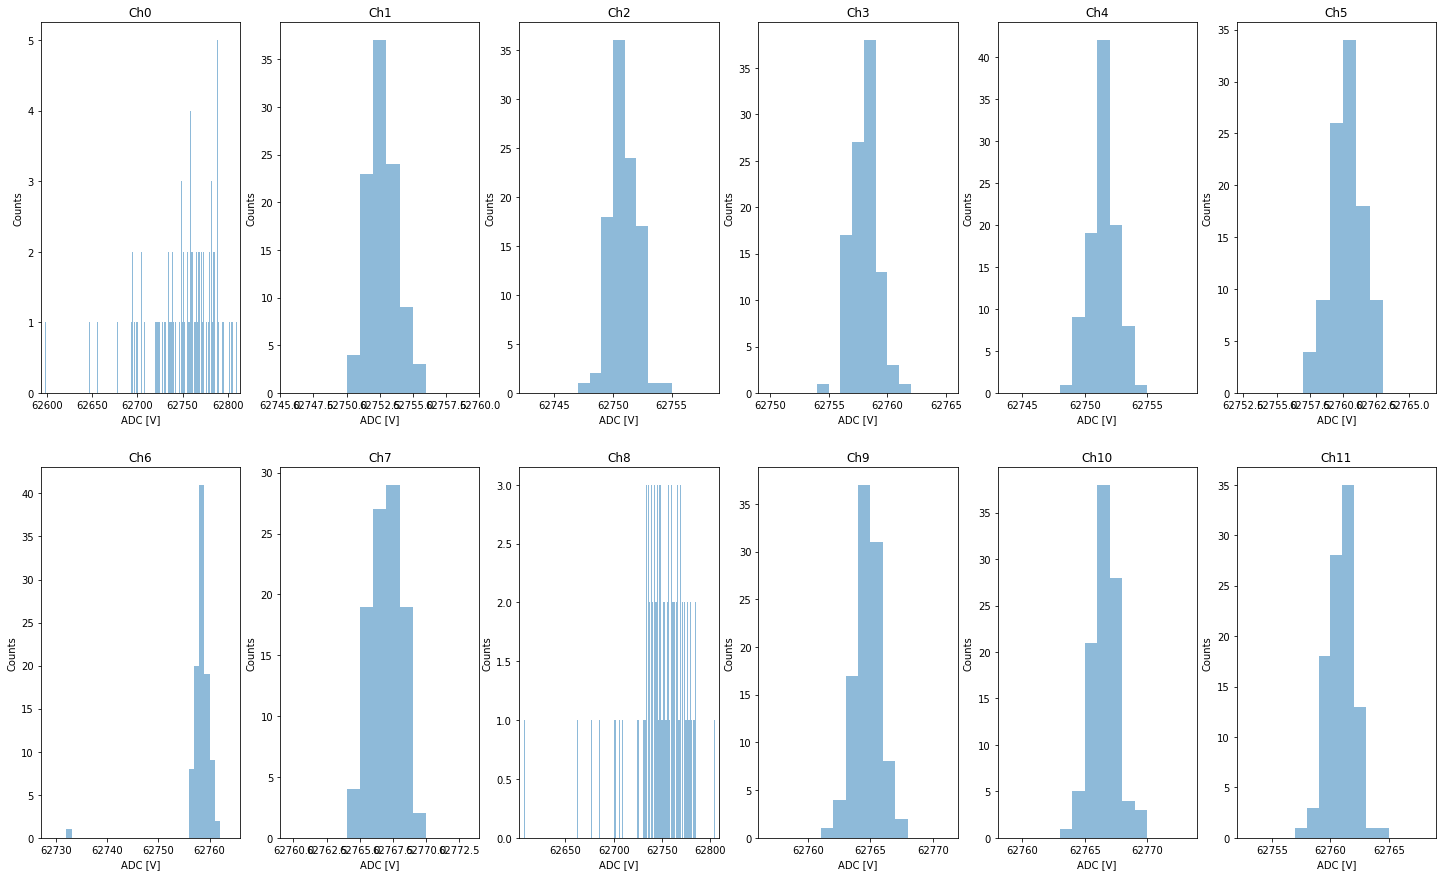

In [4]:
DACset000, ADC000, HV000 = GetADCvalues(file_DACset000)

DACset3FF, ADC3FF, HV3FF = GetADCvalues(file_DACset3FF)

DACsetCFF, ADCCFF, HVCFF = GetADCvalues(file_DACsetCFF)

DACsetFFF, ADCFFF, HVFFF = GetADCvalues(file_DACsetFFF)


In [6]:
df = pd.DataFrame(list(zip(ADC000, DMM_000, ADC3FF, DMM_3FF, ADCCFF, DMM_CFF, ADCFFF, DMM_FFF)), 
    columns = ['ADC000', 'DMM000' ,  'ADC3FF', 'DMM3FF', 'ADCCFF', 'DMMCFF', 'ADCFFF', 'DMMFFF'])
df

,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF
0,e52e,108.750,e92c,110.642,f229,114.904,f527,116.323
1,e51d,108.713,e91a,110.606,f211,114.862,f512,116.287
2,e529,108.738,e928,110.633,f223,114.895,f51f,116.311
3,e53e,108.775,e93a,110.667,f235,114.926,f535,116.350
4,e532,108.756,e92d,110.647,f229,114.906,f528,116.327
5,e534,108.761,e933,110.653,f22e,114.915,f52c,116.334
6,e52b,108.741,e924,110.626,f228,114.902,f525,116.322
7,e525,108.729,e922,110.621,f222,114.891,f51e,116.307
8,e532,108.755,e926,110.645,f226,114.914,f525,116.332
9,e52e,108.747,e92b,110.637,f227,114.901,f528,116.324


In [16]:
df_aftercalibtest = compute_CalibBiasV(df, df_calibparam, values)
df_aftercalibtest.reset_index(inplace=True)
df_aftercalibtest  

,index,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF,ADC000_calib,...,ADC000sigma,ADC3FF_calib,ADC3FFerr,ADC3FFsigma,ADCCFF_calib,ADCCFFerr,ADCCFFsigma,ADCFFF_calib,ADCFFFerr,ADCFFFsigma
0,0,58670,108.750,59692,110.642,61993,114.904,62759,116.323,108.744845,...,2.781225,110.639122,0.002878,1.552738,114.904025,-0.000025,-0.013758,116.323806,-0.000806,-0.435123
1,1,58653,108.713,59674,110.606,61969,114.862,62738,116.287,108.713335,...,-0.181009,110.605759,0.000241,0.130024,114.859541,0.002459,1.326409,116.284883,0.002117,1.142163
2,2,58665,108.738,59688,110.633,61987,114.895,62751,116.311,108.735577,...,1.306987,110.631708,0.001292,0.697060,114.892905,0.002095,1.130564,116.308978,0.002022,1.090639
3,3,58686,108.775,59706,110.667,62005,114.926,62773,116.350,108.774501,...,0.269220,110.665071,0.001929,1.040734,114.926267,-0.000267,-0.144322,116.349756,0.000244,0.131913
4,4,58674,108.756,59693,110.647,61993,114.906,62760,116.327,108.752259,...,2.018344,110.640975,0.006025,3.250337,114.904025,0.001975,1.065282,116.325660,0.001340,0.722957
5,5,58676,108.761,59699,110.653,61998,114.915,62764,116.334,108.755966,...,2.715943,110.652096,0.000904,0.487456,114.913293,0.001707,0.920960,116.333074,0.000926,0.499595
6,6,58667,108.741,59684,110.626,61992,114.902,62757,116.322,108.739284,...,0.925546,110.624294,0.001706,0.920421,114.902172,-0.000172,-0.092797,116.320099,0.001901,1.025357
7,7,58661,108.729,59682,110.621,61986,114.891,62750,116.307,108.728163,...,0.451308,110.620587,0.000413,0.222822,114.891051,-0.000051,-0.027516,116.307125,-0.000125,-0.067440
8,8,58674,108.755,59686,110.645,61990,114.914,62757,116.332,108.752259,...,1.478824,110.628001,0.016999,9.171298,114.898465,0.015535,8.381441,116.320099,0.011900,6.420556
9,9,58670,108.747,59691,110.637,61991,114.901,62760,116.324,108.744845,...,1.162665,110.637268,-0.000268,-0.144861,114.900318,0.000681,0.367683,116.325660,-0.001660,-0.895603


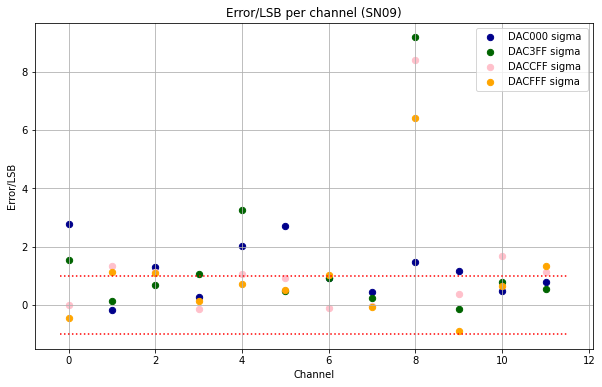

In [17]:
drawplot(df_aftercalibtest, SN_board)

In [9]:
df_aftercalibtest[['DMM000', 'ADC000_calib', 'ADC000sigma', 'DMM3FF', 'ADC3FF_calib', 'ADC3FFsigma', 'DMMCFF', 'ADCCFF_calib', 'ADCCFFsigma']]


,DMM000,ADC000_calib,ADC000sigma,DMM3FF,ADC3FF_calib,ADC3FFsigma,DMMCFF,ADCCFF_calib,ADCCFFsigma
0,108.750,108.744845,2.781225,110.642,110.639122,1.552738,114.904,114.904025,-0.013758
1,108.713,108.713335,-0.181009,110.606,110.605759,0.130024,114.862,114.859541,1.326409
2,108.738,108.735577,1.306987,110.633,110.631708,0.697060,114.895,114.892905,1.130564
3,108.775,108.774501,0.269220,110.667,110.665071,1.040734,114.926,114.926267,-0.144322
4,108.756,108.752259,2.018344,110.647,110.640975,3.250337,114.906,114.904025,1.065282
5,108.761,108.755966,2.715943,110.653,110.652096,0.487456,114.915,114.913293,0.920960
6,108.741,108.739284,0.925546,110.626,110.624294,0.920421,114.902,114.902172,-0.092797
7,108.729,108.728163,0.451308,110.621,110.620587,0.222822,114.891,114.891051,-0.027516
8,108.755,108.752259,1.478824,110.645,110.628001,9.171298,114.914,114.898465,8.381441
9,108.747,108.744845,1.162665,110.637,110.637268,-0.144861,114.901,114.900318,0.367683


In [10]:
df_aftercalibtest[['ADC000sigma',  'ADC3FFsigma', 'ADCCFFsigma', 'ADCFFFsigma']]

,ADC000sigma,ADC3FFsigma,ADCCFFsigma,ADCFFFsigma
0,2.781225,1.552738,-0.013758,-0.435123
1,-0.181009,0.130024,1.326409,1.142163
2,1.306987,0.697060,1.130564,1.090639
3,0.269220,1.040734,-0.144322,0.131913
4,2.018344,3.250337,1.065282,0.722957
5,2.715943,0.487456,0.920960,0.499595
6,0.925546,0.920421,-0.092797,1.025357
7,0.451308,0.222822,-0.027516,-0.067440
8,1.478824,9.171298,8.381441,6.420556
9,1.162665,-0.144861,0.367683,-0.895603
